In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/MNIST_data",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /MNIST_data\t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [12]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
sample = mnist.train.images[1203].reshape(28,28)

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

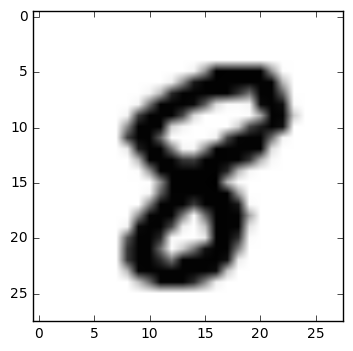

In [9]:
plt.imshow(sample,cmap="Greys")

3 basic parameters:

> 1) Learning Rate  
2) No: of Training epochs  
3) Batch Size

In [10]:
learning_rate = 0.001  # How quickly we adjust the cost function - Gradient Descent
training_epochs = 15   # How many training cycles we go through
batch_size = 100       # Size of the batches of training data

In [11]:
# Network parameters
# These are parameters that will directly define what our Neural Network will look like

n_classes = 10 #In this case 0-9 numbers are the output classes
n_samples = 55000  # In this case there are 55000 images in the dataset
n_samples = mnist.train.num_examples

In [12]:
n_input = 784 # Flattened 28x28 image in this case

In [13]:
# Choose: How many neurons do we want in the two hidden layers?

n_hidden_1 = 256  # Common value to use when working with image data
n_hidden_2 = 256  # 8-bit color storage

#### What Next?

* First we are going to receive the input data array and send it to the first hidden layer
* Then the data will begin to have a weights attached to it between the layers.
Remember that this starts as a random value initially.
* We also add a bias along with that

Then it is going to continue on until the final output layer.

In this case, we are going to use two hidden layers. But the more we use, the longer it will take to process.

However if we use a bunch of hidden layers, it has the opportunity to possibly be more accurate on the training data.

Once that transformed data that has been multiplied by these waits has reached the output layer. 

We need to evaluate it ones it reaches the end, how far off we are and that's where the reinforcement comes into play.

We're going to use something known as a Loss function and this is also called a cost function and we want to use this function to evaluate how far off we are from the desired results. In this case, we're going to basically check how many classes did we get correct.  

After we get the Loss funtion, what we want to do is to try and minimize the cost or lower the error. And this is done by adjusting the weight values accordingly across the entire network. 

In this example "Atom" Optimizer is used.



# RELU Activation Funtion

In [14]:
#RELU Activation Funtion

def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [15]:
# Dictionary of Weights
#Dictionary of Bias

#tf.Variable : TensorFlow Graph objects can become aware of the states of all the variable and a variable is a modifiable tensor
# that lives in TensorFlow's graph of interacting operations and it can be used and even modified by the 

In [16]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [17]:
#Output would look like this
#[0 0 0 0 0 1 0 0 0 0]

In [18]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [19]:
x = tf.placeholder('float', [None, n_input])

In [20]:
y = tf.placeholder('float', [None, n_classes])

In [21]:
# Construct model
pred = multilayer_perceptron(x, weights, biases)

In [22]:
# Cost optimization Functions
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Training the Model

In [23]:
t = mnist.train.next_batch(1)

In [24]:
Xsamp, ysamp = t

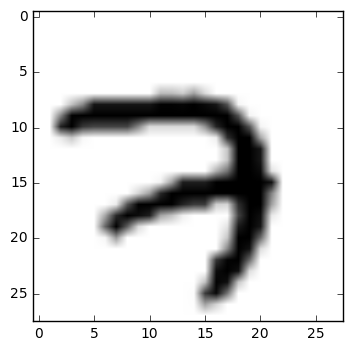

In [25]:
plt.imshow(Xsamp.reshape(28,28),cmap='Greys')

In [26]:
ysamp

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

## Run the Session

In [27]:
# Launching an Interactive Session

sess = tf.InteractiveSession()

In [28]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [29]:
sess.run(init)

In [30]:
# 15 loops
for epoch in range(training_epochs):
    
    # Cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        
        avg_cost += c/total_batch
        
    print('Epoch: {} cost {:,.4f}'.format(epoch+1,avg_cost))
    
print("Model has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost 160.1245
Epoch: 2 cost 42.1989
Epoch: 3 cost 26.2072
Epoch: 4 cost 17.9879
Epoch: 5 cost 12.8770
Epoch: 6 cost 9.4911
Epoch: 7 cost 6.9674
Epoch: 8 cost 5.1375
Epoch: 9 cost 3.8300
Epoch: 10 cost 2.8068
Epoch: 11 cost 2.1876
Epoch: 12 cost 1.6359
Epoch: 13 cost 1.1358
Epoch: 14 cost 0.9836
Epoch: 15 cost 0.7338
Model has completed 15 Epochs of training


## Model Evaluations

In [31]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [ ]:
print(correct_predictions[0])

In [32]:
correct_predictions = tf.cast(correct_predictions,'float')

In [33]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=float32)


In [34]:
accuracy = tf.reduce_mean(correct_predictions)

In [35]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [36]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [37]:
accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

0.94840002